# Phase 3: SQL Queries

In [5]:
import sqlite3
import csv
import chardet
import pandas as pd

In [6]:
db=sqlite3.connect("crime_database")
cursor=db.cursor()

In [7]:
# Check if the table exists
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='crime_against_women_new1'")
if cursor.fetchone() is None:
    # Table doesn't exist, create it
    cursor.execute("CREATE TABLE crime_against_women_new1(state UT TEXT,DISTRICT TEXT,Year INT,Rape INT,Kidnapping INT,Dowry Deaths INT,Assault INT,Insult  INT,Cruelty by Husband  INT,Importation of Girls INT)")
    db.commit()


# 3.1 Creating a table with the entries from 42_District_wise_crimes_committed_against_women_2001_2012.csv.

In [8]:
with open(r"C:\Users\rupad\42_District_wise_crimes_committed_against_women_2001_2012.csv", 'r') as file:
    no_records = 0
    for row in file:
        cursor.execute("INSERT INTO crime_against_women_new1 VALUES(?,?,?,?,?,?,?,?,?,?)", row.split(","))
        db.commit()

In [ ]:
print(no_records,'Records Inserted')

# 3.2 Creating an SQL query to determine which state, district, and year had the most number of rapes and kidnappings.

In [9]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MAX(Rape), MAX(Kidnapping) FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kidnapping DESC")
for row in result:
    print(row)

('STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction')
('WEST BENGAL', 'MURSHIDABAD', 2011, 433, 492)
('WEST BENGAL', 'MURSHIDABAD', 2012, 257, 464)
('WEST BENGAL', 'MURSHIDABAD', 2010, 526, 441)
('DELHI', 'NORTH-WEST', 2005, 236, 349)
('WEST BENGAL', 'MURSHIDABAD', 2009, 568, 342)
('UTTAR PRADESH', 'LUCKNOW', 2008, 334, 331)
('DELHI', 'NORTH WEST', 2001, 145, 298)
('DELHI', 'NORTH-WEST', 2006, 224, 287)
('DELHI', 'NORTH WEST', 2002, 159, 259)
('DELHI', 'OUTER', 2007, 369, 237)
('ASSAM', 'GUWAHATI CITY', 2004, 197, 228)
('DELHI', 'NORTH WEST', 2003, 137, 191)


The highest district and state in terms of rape and kidnapping incidents is Murshidabad District in West Bengal (which had 568 rape cases and 492 kidnapping cases in 2011).

# 3.3 Creating an SQL query to determine which state, district, and year had the fewest rapes and kidnappings.

In [10]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MIN(Rape), MIN(Kidnapping) FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY Kidnapping")
for row in result:
    print(row)

('A & N ISLANDS', 'NICOBAR', 2001, 0, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0)
('ARUNACHAL PRADESH', 'TAWANG', 2001, 0, 0)
('ASSAM', 'C.I.D.', 2001, 0, 0)
('BIHAR', 'ARWAL', 2001, 0, 0)
('CHHATTISGARH', 'BIZAPUR', 2001, 0, 0)
('DAMAN & DIU', 'DIU', 2001, 0, 0)
('DELHI', 'S.T.F.', 2001, 0, 0)
('GUJARAT', 'W.RLY', 2001, 0, 0)
('HARYANA', 'GRP', 2002, 0, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0, 0)
('JHARKHAND', 'DEOGHAR', 2001, 0, 0)
('KARNATAKA', 'CHITRADURGA', 2001, 0, 0)
('KERALA', 'CBCID', 2001, 0, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0, 0)
('MADHYA PRADESH', 'INDORE RLY.', 2001, 0, 0)
('MAHARASHTRA', 'MUMBAI RLY.', 2001, 0, 0)
('MANIPUR', 'CHURACHANDPUR', 2001, 0, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0, 0)
('MIZORAM', 'AIZAWL', 2001, 0, 0)
('NAGALAND', 'KIPHIRE', 2001, 0, 0)
('ODISHA', 'RAYAGADA', 2001, 0, 0)
('PUDUCHERRY', 'KARAIKAL', 2011, 0, 0)
('PUNJAB', 'G.R.P', 2001, 0, 0)
('RAJASTHAN', 'G.R.P.', 2003, 0, 0)
('S

# 3.4 Creating a new table with the records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv.

In [11]:
# Check if the table exists
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='crime_against_st_new'")
if cursor.fetchone() is None:
    # Table doesn't exist, create it
    cursor.execute("CREATE TABLE crime_against_st_new (state UT TEXT,DISTRICT TEXT,Year INT,Murder INT,Rape INT,Kidnapping INT,Dacoity INT,Robbery INT,Arson  INT,Hurt INT,PCR INT,POA INT,Other Crimes INT)")
    db.commit()

In [12]:
with open(r"C:\Users\rupad\42_District_wise_crimes_committed_against_women_2001_2012.csv", 'r') as file:
    no_records = 0
    for row in file:
        cursor.execute("INSERT INTO crime_against_women_new1 VALUES(?,?,?,?,?,?,?,?,?,?)", row.split(","))
        db.commit()

# 3.5 Creating an SQL query to see which district has the most robberies or dacoities.

In [14]:
result=cursor.execute("SELECT State UT,DISTRICT ,Year, MAX(Dacoity), MAX(Robbery) FROM crime_against_st_new WHERE NOT DISTRICT ='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY Robbery  DESC ")
for row in result:
    print(row)

In 2001, the maximum number of Daocity and Robberies occurred in Gujarat's Dahod District.

# 3.6 Creating an SQL query to see which districts (all) have the fewest murders.

In [15]:
result=cursor.execute("SELECT State UT,DISTRICT, Murder FROM crime_against_st_new WHERE Murder=(SELECT MIN(Murder) FROM crime_against_st_new) GROUP BY state ")
for row in result:
    print(row)

In [16]:
result=cursor.execute("SELECT State UT,DISTRICT, Murder FROM crime_against_st_new WHERE Murder=(SELECT MIN(Murder) FROM crime_against_st_new) GROUP BY state ")
for row in result:
    print(row)

In [17]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MIN(Rape), MIN(Kidnapping) FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY Kidnapping")
for row in result:
    print(row)

('A & N ISLANDS', 'NICOBAR', 2001, 0, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0)
('ARUNACHAL PRADESH', 'TAWANG', 2001, 0, 0)
('ASSAM', 'C.I.D.', 2001, 0, 0)
('BIHAR', 'ARWAL', 2001, 0, 0)
('CHHATTISGARH', 'BIZAPUR', 2001, 0, 0)
('DAMAN & DIU', 'DIU', 2001, 0, 0)
('DELHI', 'S.T.F.', 2001, 0, 0)
('GUJARAT', 'W.RLY', 2001, 0, 0)
('HARYANA', 'GRP', 2002, 0, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0, 0)
('JHARKHAND', 'DEOGHAR', 2001, 0, 0)
('KARNATAKA', 'CHITRADURGA', 2001, 0, 0)
('KERALA', 'CBCID', 2001, 0, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0, 0)
('MADHYA PRADESH', 'INDORE RLY.', 2001, 0, 0)
('MAHARASHTRA', 'MUMBAI RLY.', 2001, 0, 0)
('MANIPUR', 'CHURACHANDPUR', 2001, 0, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0, 0)
('MIZORAM', 'AIZAWL', 2001, 0, 0)
('NAGALAND', 'KIPHIRE', 2001, 0, 0)
('ODISHA', 'RAYAGADA', 2001, 0, 0)
('PUDUCHERRY', 'KARAIKAL', 2011, 0, 0)
('PUNJAB', 'G.R.P', 2001, 0, 0)
('RAJASTHAN', 'G.R.P.', 2003, 0, 0)
('S

# 3.7 To find the number of murders year-by-year and in ascending order by district, creating an SQL query.

In [20]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MIN(Rape), MIN(Kidnapping) FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY Kidnapping")
for row in result:
    print(row)

('A & N ISLANDS', 'NICOBAR', 2001, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)
('ARUNACHAL PRADESH', 'TAWANG', 2001, 0)
('ASSAM', 'C.I.D.', 2001, 0)
('BIHAR', 'ARWAL', 2001, 0)
('CHHATTISGARH', 'BIZAPUR', 2001, 0)
('DAMAN & DIU', 'DIU', 2001, 0)
('DELHI', 'S.T.F.', 2001, 0)
('GUJARAT', 'W.RLY', 2001, 0)
('HARYANA', 'GRP', 2002, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0)
('JHARKHAND', 'DEOGHAR', 2001, 0)
('KARNATAKA', 'CHITRADURGA', 2001, 0)
('KERALA', 'CBCID', 2001, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0)
('MADHYA PRADESH', 'INDORE RLY.', 2001, 0)
('MAHARASHTRA', 'MUMBAI RLY.', 2001, 0)
('MANIPUR', 'CHURACHANDPUR', 2001, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0)
('MIZORAM', 'AIZAWL', 2001, 0)
('NAGALAND', 'KIPHIRE', 2001, 0)
('ODISHA', 'RAYAGADA', 2001, 0)
('PUDUCHERRY', 'KARAIKAL', 2011, 0)
('PUNJAB', 'G.R.P', 2001, 0)
('RAJASTHAN', 'G.R.P.', 2003, 0)
('SIKKIM', 'NORTH', 2001, 0)
('TAMIL NADU', 'CHENNAI', 2001, 0)
('TRIPURA', 'DHAL

# 3.8.1 Creating a new table and adding records from 01_District_wise_crimes_committed_IPC_2001_2012.csv, including only the columns for YEAR, MURDER, ATTEMPT TO MURDER, and RAPE.

In [21]:
import pandas as pd

In [22]:
cursor.execute ("CREATE TABLE crime_ipc_new(STATE UT TEXT,DISTRICT TEXT,YEAR INT, MURDER INT,ATTEMPT_to_MURDER INT,RAPE INT) ")

In [23]:
db.commit()

In [28]:
cursor.execute("""CREATE TABLE IF NOT EXISTS crime_ipc_new (state TEXT,district TEXT,year INTEGER,ipc_crimes INTEGER,total_cognizable_crimes INTEGER,population INTEGER)""")

with open('42_District_wise_crimes_committed_against_women_2001_2012.csv', 'r') as file:
    no_records = 0
    for row in file:
        # Split the row into values
        values = row.strip().split(",")
        
        # Insert data into the table
        cursor.execute("INSERT INTO crime_ipc_new VALUES(?,?,?,?,?,?)", values[:6])
        db.commit()
        no_records += 1

print(f"{no_records} records inserted.")

9018 records inserted.


# 3.8.2 To determine which district in each state or territory has the most murders annually, creating an SQL query. The STATE/UT, YEAR, DISTRICT, and MURDERS to be displayed in our output.

In [29]:
result=cursor.execute("SELECT  state UT, Year,DISTRICT ,MAX(MURDER) FROM crime_ipc_new WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY MURDER DESC")
for row in result:
    print(row)

('STATE/UT', 'Year', 'DISTRICT', 'Rape')
('WEST BENGAL', 2009, 'MURSHIDABAD', 568)
('MAHARASHTRA', 2012, 'MUMBAI COMMR.', 232)
('BIHAR', 2007, 'PURNEA', 219)
('DELHI', 2005, 'NORTH-WEST', 190)
('ASSAM', 2010, 'DHUBRI', 181)
('MADHYA PRADESH', 2012, 'INDORE', 173)
('CHHATTISGARH', 2002, 'RAIPUR', 159)
('RAJASTHAN', 2012, 'UDAIPUR', 149)
('KERALA', 2011, 'TRIVANDRUM RURAL', 140)
('ANDHRA PRADESH', 2012, 'WEST GODAVARI', 130)
('TRIPURA', 2010, 'WEST', 118)
('ODISHA', 2005, 'MAYURBHANJ', 102)
('JHARKHAND', 2005, 'RANCHI', 102)
('KARNATAKA', 2011, 'BANGALORE COMMR.', 97)
('TAMIL NADU', 2012, 'CHENNAI', 94)
('UTTAR PRADESH', 2001, 'BAREILLY', 93)
('PUNJAB', 2012, 'CP LUDHIANA', 69)
('HARYANA', 2006, 'PANIPAT', 65)
('GUJARAT', 2009, 'AHMEDABAD COMMR.', 63)
('MEGHALAYA', 2012, 'KHASI HILLS EAST', 58)
('UTTARAKHAND', 2012, 'HARIDWAR', 47)
('MIZORAM', 2012, 'AIZAWL', 42)
('JAMMU & KASHMIR', 2012, 'JAMMU', 39)
('HIMACHAL PRADESH', 2004, 'SHIMLA', 34)
('CHANDIGARH', 2005, 'CHANDIGARH', 33)
('GOA',

In [30]:

dfsql=pd.read_sql("SELECT  state UT, Year,DISTRICT ,MAX(MURDER) AS Murder FROM crime_ipc_new WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY MURDER DESC ",db)

In [31]:
#transforming to a dataframe
dfsql


,UT,YEAR,DISTRICT,Murder
0,STATE/UT,Year,DISTRICT,Rape
1,WEST BENGAL,2009,MURSHIDABAD,568
2,MAHARASHTRA,2012,MUMBAI COMMR.,232
3,BIHAR,2007,PURNEA,219
4,DELHI,2005,NORTH-WEST,190
5,ASSAM,2010,DHUBRI,181
6,MADHYA PRADESH,2012,INDORE,173
7,CHHATTISGARH,2002,RAIPUR,159
8,RAJASTHAN,2012,UDAIPUR,149
9,KERALA,2011,TRIVANDRUM RURAL,140


# 3.8.3 The data (3.2 result) to be stored in a DataFrame. Districts that appear three or more years in the past to be analyzed, and the associated state/UT, district, murders, and year to be printed in decreasing order.

In [32]:
#.3.2 Creating an SQL query to determine which state, district, and year had the greatest number of rapes and kidnappings.
data=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MAX(Rape), MAX(Kidnapping) FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kidnapping DESC")
for row in data:
    print(row)

('STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction')
('WEST BENGAL', 'MURSHIDABAD', 2011, 433, 492)
('WEST BENGAL', 'MURSHIDABAD', 2012, 257, 464)
('WEST BENGAL', 'MURSHIDABAD', 2010, 526, 441)
('DELHI', 'NORTH-WEST', 2005, 236, 349)
('WEST BENGAL', 'MURSHIDABAD', 2009, 568, 342)
('UTTAR PRADESH', 'LUCKNOW', 2008, 334, 331)
('DELHI', 'NORTH WEST', 2001, 145, 298)
('DELHI', 'NORTH-WEST', 2006, 224, 287)
('DELHI', 'NORTH WEST', 2002, 159, 259)
('DELHI', 'OUTER', 2007, 369, 237)
('ASSAM', 'GUWAHATI CITY', 2004, 197, 228)
('DELHI', 'NORTH WEST', 2003, 137, 191)


# Transforming to DataFrame

In [33]:
dataframe=pd.read_sql("SELECT  state UT, DISTRICT ,Year ,MAX(Rape) AS Rape, MAX(Kidnapping) AS Kidnapping FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kidnapping DESC",db)

In [34]:
dataframe

,UT,DISTRICT,Year,Rape,Kidnapping
0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction
1,WEST BENGAL,MURSHIDABAD,2011,433,492
2,WEST BENGAL,MURSHIDABAD,2012,257,464
3,WEST BENGAL,MURSHIDABAD,2010,526,441
4,DELHI,NORTH-WEST,2005,236,349
5,WEST BENGAL,MURSHIDABAD,2009,568,342
6,UTTAR PRADESH,LUCKNOW,2008,334,331
7,DELHI,NORTH WEST,2001,145,298
8,DELHI,NORTH-WEST,2006,224,287
9,DELHI,NORTH WEST,2002,159,259


In [35]:
dataframe['DISTRICT'].value_counts()

MURSHIDABAD      4
NORTH WEST       3
NORTH-WEST       2
DISTRICT         1
LUCKNOW          1
OUTER            1
GUWAHATI CITY    1
Name: DISTRICT, dtype: int64

It is evident from above that Murshidabad is the state that has been around for more than three years.

In [36]:
from sqlalchemy import create_engine

# Examining districts that have been there for three or more years, and printing the state/UT, district, number of homicides, and year in descending order.

In [37]:
engine = create_engine("sqlite+pysqlite:///:memory:")

In [38]:
dataframe.to_sql('district_data', engine)

13

In [39]:
from sqlalchemy import text

In [40]:
with engine.connect() as conn:
    result = conn.execute(text("select UT, DISTRICT ,Year FROM district_data ORDER BY UT DESC LIMIT 3"))
    for row in result:
        print(row)

('WEST BENGAL', 'MURSHIDABAD', '2011')
('WEST BENGAL', 'MURSHIDABAD', '2012')
('WEST BENGAL', 'MURSHIDABAD', '2010')


According to the West Bengal results above, Murshidabad is the district that showed up more than three times in a given year.

# 3.8.4 Making use of the proper graphs to display our data (the 3.8.3)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

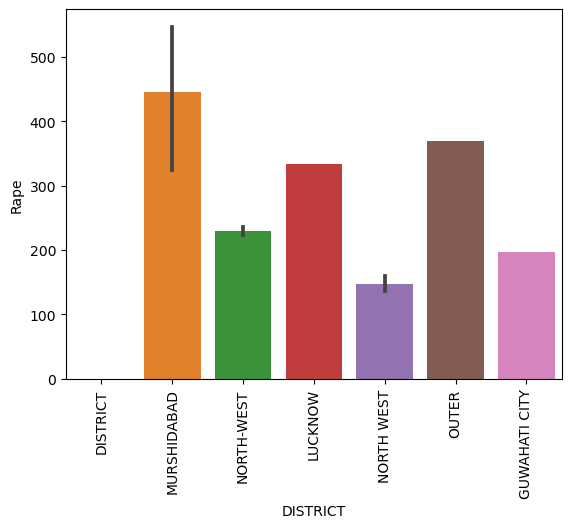

In [43]:
dataframe['Rape'] = pd.to_numeric(dataframe['Rape'], errors='coerce')
sns.barplot(x=dataframe['DISTRICT'], y=dataframe['Rape'])
plt.xticks(rotation=90)
plt.show()

According to the dataframe, the district in West Bengal with the highest number of rape cases is Murshidabad, whereas the district in Assam with the lowest number of rape crimes is Guwahati City.

# District vs. Kidnapping Analysis

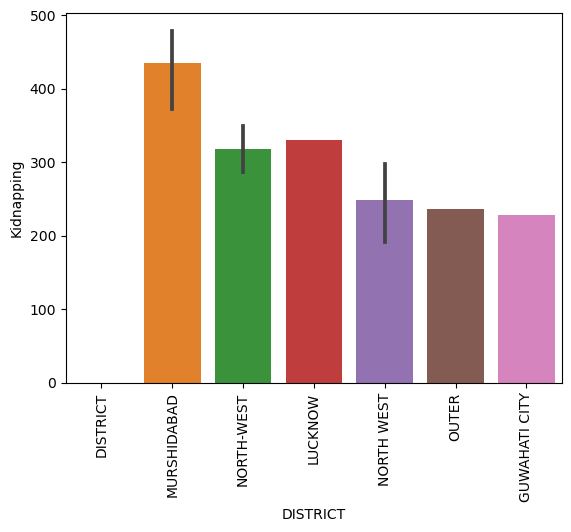

In [45]:
dataframe['Kidnapping'] = pd.to_numeric(dataframe['Kidnapping'], errors='coerce')
sns.barplot(x=dataframe['DISTRICT'], y=dataframe['Kidnapping'])
plt.xticks(rotation=90)
plt.show()

According to the resultant Dataframe, the district of Murshidabad in West Bengal has the largest number of kidnapping cases, while the district of Guwahati City in Assam has the lowest number of cases.

In [ ]:
#next phase